In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv("C:/Users/kears/NSS/Python/projects/un_data-kearstonn/data/gdp_percapita.csv")

QUESTION 5:How many rows and columns are in gdp_df? What are the data types of each column?

In [57]:
gdp_df.shape

(7176, 4)

In [4]:
datatypes = gdp_df.dtypes

In [5]:
datatypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

QUESTION 6:Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [7]:
new_gdp= gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
new_named_gdp=new_gdp.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [9]:
new_named_gdp

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


QUESTION 7:How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

### 205 countries with data for all 31 years.

In [10]:
gdp_2= new_named_gdp['Country'].value_counts().to_frame().reset_index().rename(columns={'index':'country', 'Country':'total_count'})

In [11]:
gdp_2.loc[gdp_2['total_count']== 31]

,country,total_count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


### 37 are missing data


In [58]:
gdp_2.loc[gdp_2['total_count'] != 31].count()

country        37
total_count    37
dtype: int64

In [60]:
gdp_year_data=new_named_gdp.Year.value_counts().to_frame().reset_index()

QUESTION 8:In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [65]:
gdp_2020=new_named_gdp.loc[new_named_gdp.Year == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

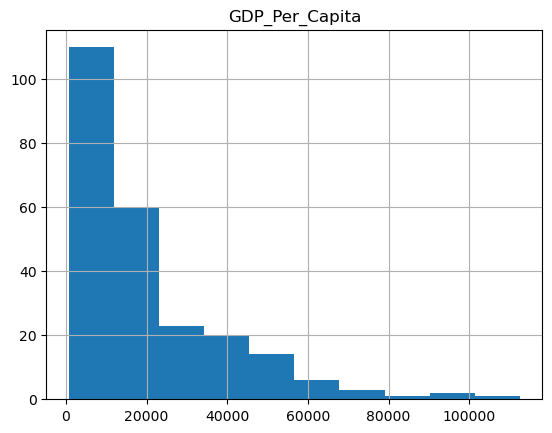

In [68]:
gdp_2020.hist('GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

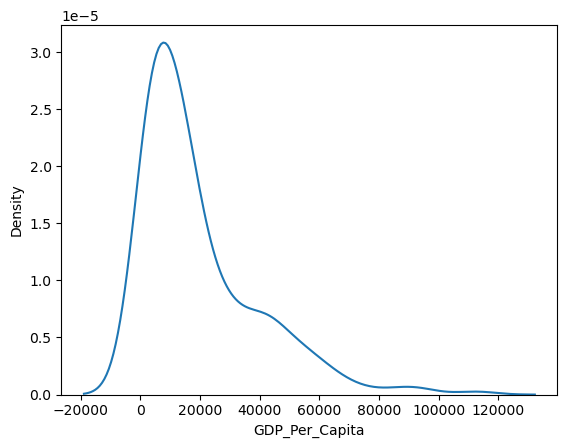

In [67]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: >

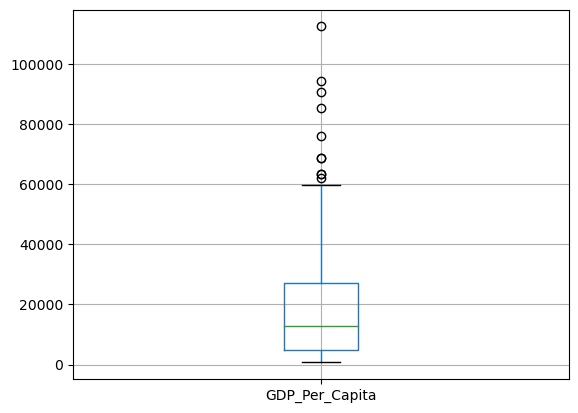

In [71]:
gdp_2020.boxplot('GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

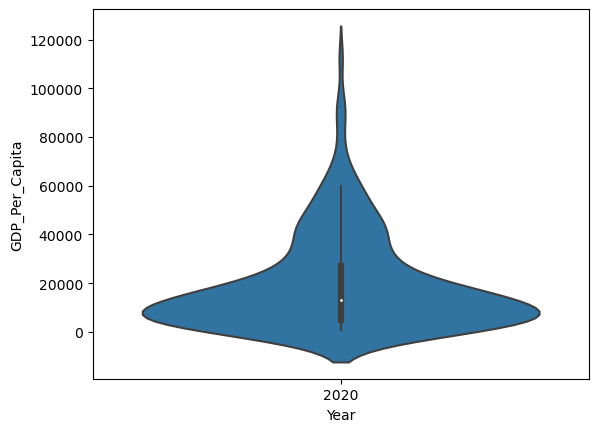

In [70]:
sns.violinplot(x= gdp_2020['Year'], y= gdp_2020['GDP_Per_Capita'])

QUESTION 9:What was the median GDP per capita value in 2020?

In [72]:
gdp_2020=new_named_gdp.loc[new_named_gdp['Year']== 2020]

In [73]:
print(gdp_2020['GDP_Per_Capita'].median())

12908.9374056206


QUESTION 10:For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots.

In [19]:
gdp_decades = new_named_gdp.loc[(new_named_gdp['Year']== 1990) | (new_named_gdp['Year']== 2000) 
                                 | (new_named_gdp['Year']==2010) | (new_named_gdp['Year']==2020)]

Above and below get the same answer, just two different ways to do it.

In [74]:
gdp_decades= new_named_gdp.loc[new_named_gdp.Year.isin([1990,2000,2010,2020])]

In [75]:
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

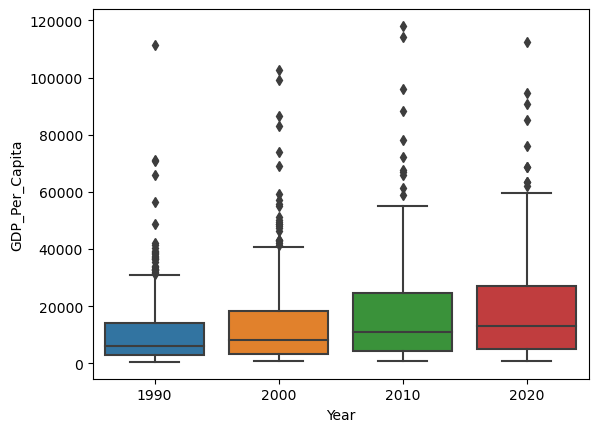

In [20]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

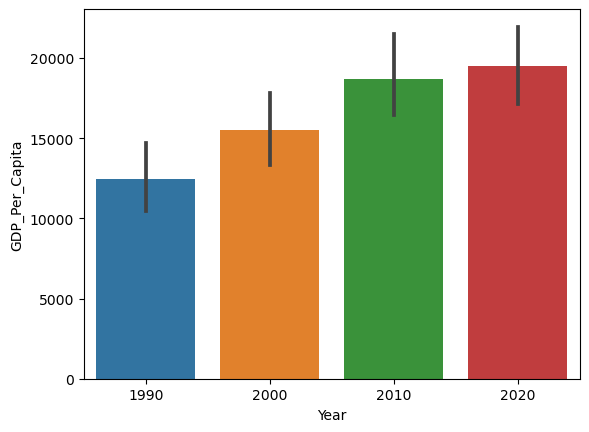

In [21]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

### Can also do the graph above like code below

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

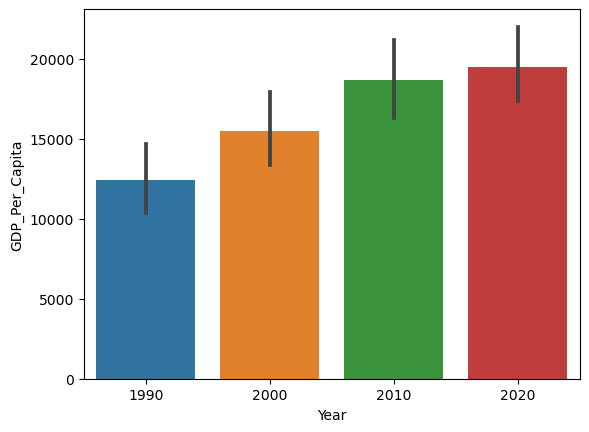

In [76]:
sns.barplot(x='Year', y='GDP_Per_Capita', data= gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

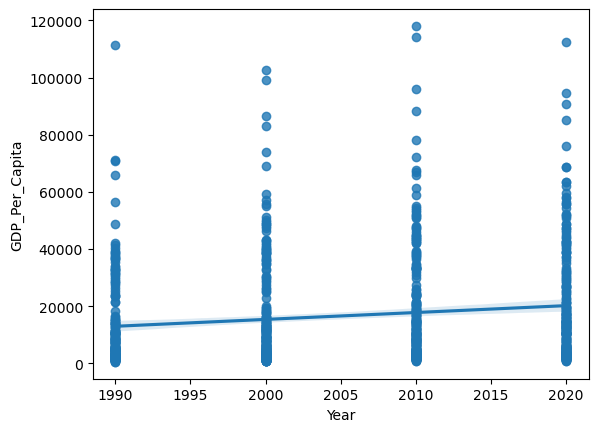

In [22]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

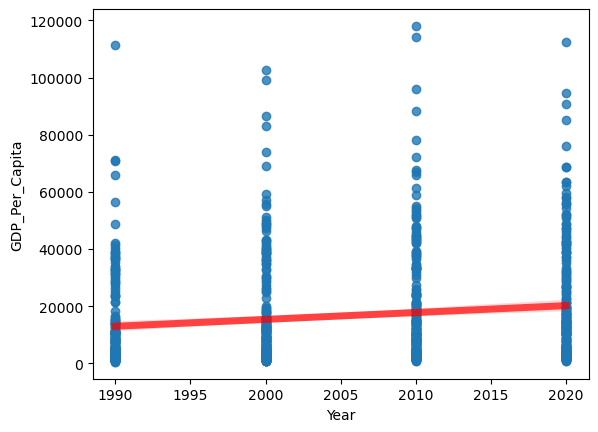

In [23]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], line_kws={'color':'r', 'alpha': 0.7, 'lw': 5})
plt.show()

QUESTION 11:Which country was the first to have a GDP per capita greater than $100,000?
United Arab Emirates 1990

In [78]:
new_named_gdp.loc[new_named_gdp['GDP_Per_Capita']> 100000] .sort_values('Year').head(1)

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


QUESTION 12:Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.Luxembourg

In [25]:
gdp_2020=new_named_gdp.loc[new_named_gdp['Year']== 2020]

In [80]:
gdp_2020.sort_values('GDP_Per_Capita', ascending = False).head(1).Country.to_list()

['Luxembourg']

In [81]:
luxembourg_gdp= new_named_gdp.loc[new_named_gdp['Country']== 'Luxembourg']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

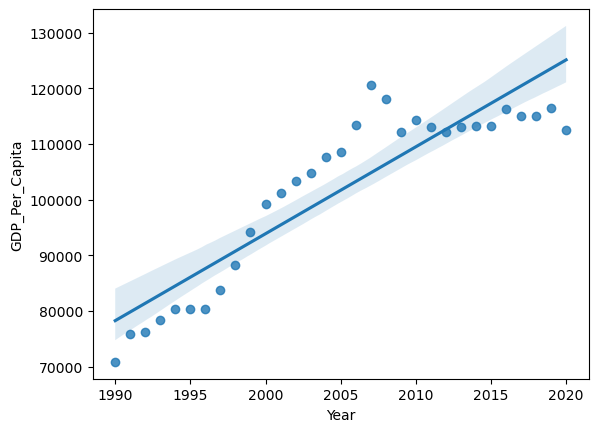

In [82]:
sns.regplot(x=luxembourg_gdp['Year'], y=luxembourg_gdp['GDP_Per_Capita'])

QUESTION 13:Which country had the lowest GDP per capita in 2020? ~ Burundi
    Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
    Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
        Which countries had lower GDP per capita in 2020 than in 1990?

In [83]:
gdp_2020.sort_values('GDP_Per_Capita', ascending = True).head(1).Country.to_list()

['Burundi']

### 2 different ways to get the answer

In [29]:
gdp_2020=new_named_gdp.loc[new_named_gdp['Year']== 2020]

In [30]:
gdp_2020.loc[gdp_2020['GDP_Per_Capita'] < 1000]

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470


In [31]:
min(gdp_2020['GDP_Per_Capita'])

731.064073644609

In [32]:
burundi_gdp= new_named_gdp.loc[new_named_gdp['Country']== 'Burundi']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

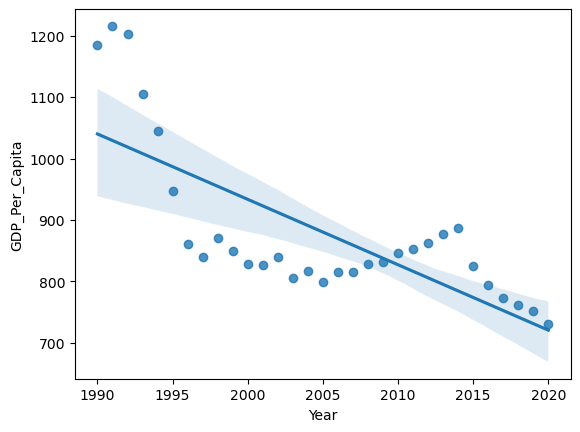

In [33]:
sns.regplot(x=burundi_gdp['Year'], y=burundi_gdp['GDP_Per_Capita'])

QUESTION 14:Read in the internet use dataset into a DataFrame named internet_df. 
    You will likely get errors when doing this. 
    Check the arguments for the read_csv function to find ones that can help correct the errors 
    (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 
    Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been 
    read in correctly. Also, check the datatypes of the columns.

In [34]:
internet_df = pd.read_csv("C:/Users/kears/NSS/Python/projects/un_data-kearstonn/data/internet_use.csv",nrows=4495)

In [35]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


QUESTION 15:Drop the Value Footnotes column and rename the remaining three to 
    'Country', 'Year', and 'Internet_Users_Pct'.

In [36]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [37]:
internet_df= internet_df.drop(columns = ['Value Footnotes'])

In [38]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [39]:
internet_df=internet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

In [40]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


QUESTION 16:Look at the number of observations in this dataset per year. What do you notice? 

In [85]:
internet_years=internet_df.Year.value_counts().to_frame().reset_index()

In [86]:
internet_years.columns= ['Year', 'Count']

In [87]:
internet_years.sort_values('Year')

,Year,Count
42,1960,7
27,1965,7
28,1970,7
29,1975,7
30,1976,7
31,1977,7
32,1978,7
33,1979,7
26,1980,7
35,1981,7


QUESTION 17:What is the first year to have a non-zero internet users percentage value? 2002

In [42]:
internet_df.loc[internet_df['Internet_Users_Pct']>= 1]

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4481,Zimbabwe,2006,9.791842
4482,Zimbabwe,2005,8.015978
4483,Zimbabwe,2004,6.564045
4484,Zimbabwe,2003,6.394786


QUESTION 18:How does the distribution of internet users percent differ for 2000 and 2014?Most 2000 percents are less than 1%, and most of the 2014 percents are significantly higher.

In [43]:
year_internet= internet_df.loc[(internet_df['Year']==2000) | (internet_df['Year']==2014)]

In [44]:
year_internet

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


QUESTION 19:For how many countries was the percentage of internet users below 5% in 2014?

In [45]:
internet_2014=internet_df.loc[(internet_df['Internet_Users_Pct']<5)&(internet_df['Year']==2014)]
internet_2014.count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

QUESTION 20:Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [46]:
gdp_and_internet_use = pd.merge(new_named_gdp, internet_df,
                               left_on = ['Country', 'Year'], right_on = ['Country','Year'],
                               how = 'outer')
                               
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


QUESTION 21:Find the three countries with the highest internet users percentage in 2014. 
    Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) 
    to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [47]:
gdp_and_internet_use_21 = gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_21.head()                                            

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09


In [48]:
gdp_and_internet_use_21['Internet_Users_Pct'].nlargest(n=3)

2803    98.16
645     96.80
4880    96.30
Name: Internet_Users_Pct, dtype: float64

In [49]:
gdp_and_internet_users_21= gdp_and_internet_use_21.loc[(gdp_and_internet_use_21['Internet_Users_Pct']== 98.16)| (gdp_and_internet_use_21['Internet_Users_Pct']==96.80)| (gdp_and_internet_use_21['Internet_Users_Pct']==96.30)]

In [50]:
gdp_and_internet_users_21

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
645,Bermuda,2014,77361.104881,96.80
2803,Iceland,2014,50450.741612,98.16
4880,Norway,2014,62390.130313,96.30


In [51]:
gdp_and_internet_use=gdp_and_internet_use.loc[(gdp_and_internet_use['Country']== 'Bermuda')| (gdp_and_internet_use['Country']=='Iceland')| (gdp_and_internet_use['Country']== 'Norway')]

In [52]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

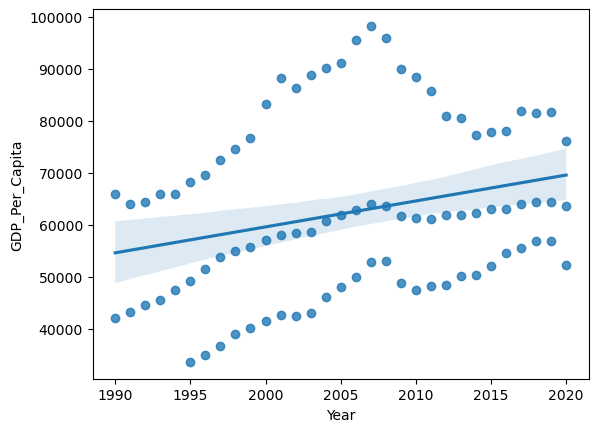

In [53]:
sns.regplot(x=gdp_and_internet_use['Year'], y=gdp_and_internet_use['GDP_Per_Capita'])

QUESTION 22:Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [54]:
gdp_and_internet_use_2014= gdp_and_internet_use.loc[gdp_and_internet_use['Year']== 2014]

In [55]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
645,Bermuda,2014,77361.104881,96.80
2803,Iceland,2014,50450.741612,98.16
4880,Norway,2014,62390.130313,96.30


QUESTION 23:Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. 
    What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

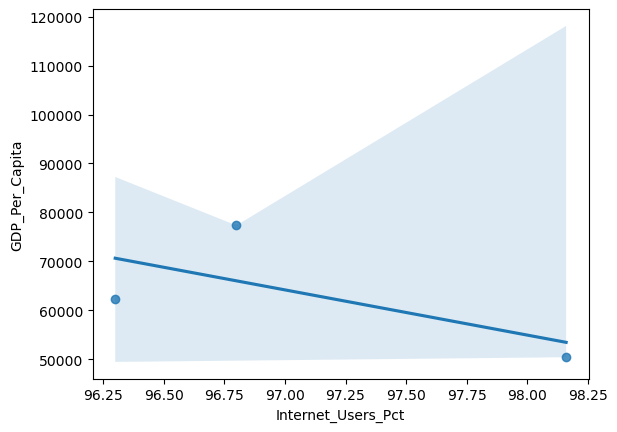

In [56]:
sns.regplot(x=gdp_and_internet_use_2014['Internet_Users_Pct'], y=gdp_and_internet_use_2014['GDP_Per_Capita'])